# CALLING LIBRARIES TO BE USED FOR MAIZE LEAF DETECTION USING CONVOLUTIONAL NEURAL NETWORKS BASING ON MY INTERNSHIP REPORT I  AUTHORED DURING MY INTERNSHIP

In [14]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

In [15]:
keras.__version__

'2.9.0'

In [16]:
train_data_path = r"C:\Users\USER\Desktop\Untitled Folder\maize\train"
validation_data_path = r"C:\Users\USER\Desktop\Untitled Folder\maize\val"

In [17]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [18]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 3080 images belonging to 4 classes.


In [19]:
training_data.class_indices

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust_': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3}

In [20]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 772 images belonging to 4 classes.


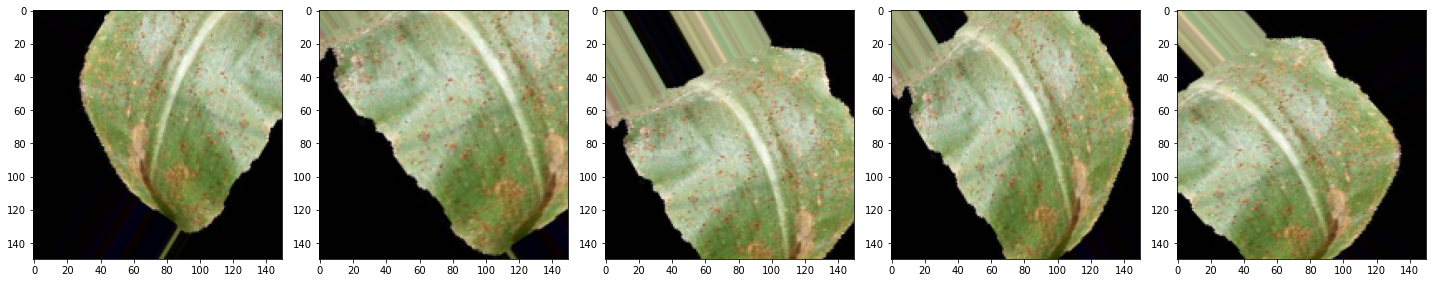

In [21]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [22]:
# save best model using vall accuracy
model_path = r"C:\Users\USER\Desktop\Untitled Folder\maize.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [23]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [25]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=10, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/10
97/97 [==============================] - ETA: 0s - loss: 0.9939 - accuracy: 0.5779
Epoch 1: val_accuracy improved from -inf to 0.80052, saving model to C:\Users\USER\Desktop\Untitled Folder\maize.h5
97/97 [==============================] - 296s 3s/step - loss: 0.9939 - accuracy: 0.5779 - val_loss: 0.5314 - val_accuracy: 0.8005
Epoch 2/10
97/97 [==============================] - ETA: 0s - loss: 0.5622 - accuracy: 0.7756
Epoch 2: val_accuracy did not improve from 0.80052
97/97 [==============================] - 276s 3s/step - loss: 0.5622 - accuracy: 0.7756 - val_loss: 0.5567 - val_accuracy: 0.7707
Epoch 3/10
97/97 [==============================] - ETA: 0s - loss: 0.4850 - accuracy: 0.8003
Epoch 3: val_accuracy did not improve from 0.80052
97/97 [==============================] - 287s 3s/step - loss: 0.4850 - accuracy: 0.8003 - val_loss: 0.5040 - val_accuracy: 0.7940
Epoch 4/10
97/97 [==============================] - ETA: 0s - loss: 0.4285 - accuracy: 0.8153
Epoch 4: val_acc

In [26]:
model_path2 = r"C:\Users\USER\Desktop\Untitled Folder\maize.h5"
cnn_model.save(model_path2)

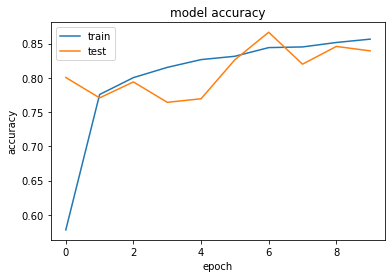

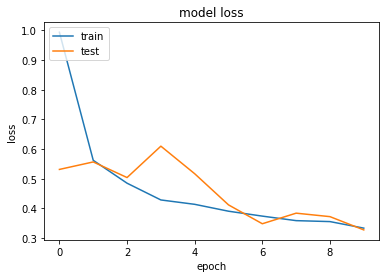

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
history.history

{'loss': [0.993924081325531,
  0.5621635317802429,
  0.4850195050239563,
  0.42851245403289795,
  0.41380107402801514,
  0.3905841112136841,
  0.3740229308605194,
  0.358780175447464,
  0.35557231307029724,
  0.3335128724575043],
 'accuracy': [0.5779221057891846,
  0.77564936876297,
  0.8003246784210205,
  0.8152597546577454,
  0.8266233801841736,
  0.8314934968948364,
  0.8441558480262756,
  0.8451298475265503,
  0.8516233563423157,
  0.8564935326576233],
 'val_loss': [0.5314385890960693,
  0.5566937327384949,
  0.5040426254272461,
  0.6098640561103821,
  0.5169103145599365,
  0.41190823912620544,
  0.34829747676849365,
  0.38397663831710815,
  0.37224751710891724,
  0.32750535011291504],
 'val_accuracy': [0.8005181550979614,
  0.7707253694534302,
  0.7940414547920227,
  0.7642487287521362,
  0.7694300413131714,
  0.8264248967170715,
  0.8665803074836731,
  0.8199481964111328,
  0.8458549380302429,
  0.8393782377243042]}